1. 如果欠拟合

    1.可以通过增加epoch来提高性能。（Loss 并没有趋近平缓）
    
    2.可以通过模型的容量来提高性能，比如（隐藏层中的神经元数量或隐藏层数）。（Loss最后趋于平缓）


2. 如果过拟合

    1.可以通过减少epoch来提高性能，在"avlidation loss"的拐点处停止或增加实例（样本）。
  

In [509]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense,LSTM,GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras import Input, Model,Sequential
import seaborn as sns

from sklearn import preprocessing

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [510]:
data = pd.read_csv("D:/DeskTop/FC/AAPL.csv")

In [511]:
data.index = pd.to_datetime(data['Date'])
data = data.dropna()

In [512]:
data = data['Adj Close']


In [513]:
data.tail()

Date
2021-12-23    176.055695
2021-12-27    180.100540
2021-12-28    179.061859
2021-12-29    179.151749
2021-12-30    177.973251
Name: Adj Close, dtype: float64

In [514]:
data.shape

(1511,)

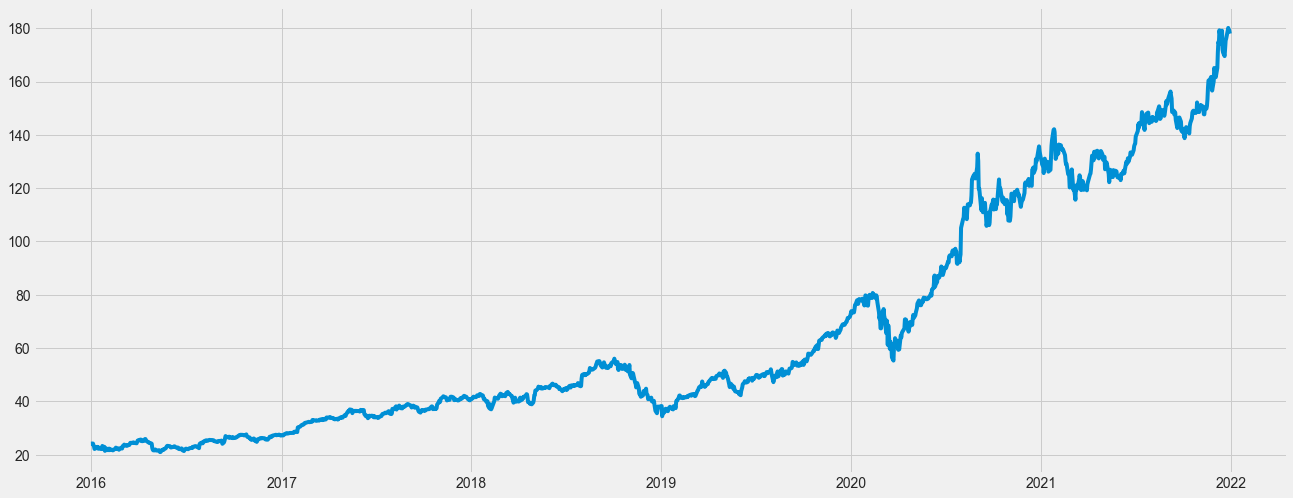

In [515]:
plt.figure(figsize=(20,8))
plt.plot(data)
plt.show()

In [516]:
def slice_window(data,k):
    window = []
    for i in range(k,len(data)+1):
        window.append(data[i-k:i])
    return np.array(window)

In [517]:
def split(per,data):
    return (data[:math.ceil(len(data)*per-1)]),(data[math.ceil(len(data)*per)-1:-1])

In [518]:
k=60
window_data = slice_window(data,k)
window_data.shape

(1452, 60)

In [519]:
# window_data[-1]

In [520]:
train_x,test_x = split(0.8,window_data)
print(train_x.shape)
print(test_x.shape)

(1161, 60)
(290, 60)


In [521]:
train_y = np.array(data[k:1161+k]).reshape(-1,1)
test_y = np.array(data[1161+k:]).reshape(-1,1)
# test_y.shape
# train_x.shape
print(train_y.shape)
print(test_y.shape)
train_y

(1161, 1)
(290, 1)


array([[ 25.325157],
       [ 25.193401],
       [ 25.424553],
       ...,
       [107.780052],
       [109.434868],
       [113.903816]])

In [522]:
sc = preprocessing.MinMaxScaler()

In [523]:
train_scalar_x = sc.fit_transform(train_x)
test_scalar_x = sc.fit_transform(test_x)
train_scalar_y = sc.fit_transform(train_y)
test_scalar_y = sc.fit_transform(test_y)

In [524]:
train_scalar_y

array([[0.03854982],
       [0.03737289],
       [0.03943769],
       ...,
       [0.77508786],
       [0.7898697 ],
       [0.82978911]])

In [525]:
# train_scalar.shape

In [526]:
print(train_scalar_x.shape)
print(test_scalar_x.shape)
print(train_scalar_y.shape)
print(test_scalar_y.shape)

(1161, 60)
(290, 60)
(1161, 1)
(290, 1)


In [527]:
# def rangescl(train_scalar,test_scalar,k):
#     x_train = []
#     y_train = []
#     x_test = []
#     y_test = []
    
#     # 拿k天预测一天，设置滑动窗口
#     for i in range(k,len(train_scalar)):
#         x_train.append(train_scalar[i-k:i,0])
#         y_train.append(train_scalar[i,0])

#     for j in range(k,len(test_scalar)):
#         x_test.append(test_scalar[j-k:j,0])
#         y_test.append(test_scalar[j,0])
#     return np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)

In [528]:
# k= 60
# x_train,y_train,x_test,y_test = rangescl(train_scalar,test_scalar,k)
x_train = np.reshape(train_scalar_x,(train_scalar_x.shape[0],k,1))
x_test = np.reshape(test_scalar_x,(test_scalar_x.shape[0],k,1))
y_train = train_scalar_y.reshape(1161)
y_test = test_scalar_y.reshape(290)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train

(1161, 60, 1)
(290, 60, 1)
(1161,)
(290,)


array([0.03854982, 0.03737289, 0.03943769, ..., 0.77508786, 0.7898697 ,
       0.82978911])

In [529]:
model = tf.keras.Sequential([
    GRU(80, return_sequences=True, activation="tanh"),
    Dropout(0.2),
    GRU(120, activation="tanh",return_sequences=True),
    Dropout(0.2),
    GRU(32, activation="tanh",return_sequences=True),
    Dropout(0.2),
    GRU(60, activation="tanh",return_sequences=True),
    Dropout(0.2),
    GRU(40, activation="tanh"),
    Dense(1, activation="relu",kernel_regularizer='l2')  
])

In [530]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="mean_squared_error")

In [531]:
history = model.fit(x_train, y_train.T, batch_size=64, epochs=100, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/100
19/19 [==============================] - 5s 74ms/step - loss: 0.0346 - val_loss: 0.0224
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0163 - val_loss: 0.0195
Epoch 4/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0147 - val_loss: 0.0180
Epoch 5/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0134 - val_loss: 0.0180
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0122 - val_loss: 0.0160
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0157
Epoch 8/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0099 - val_loss: 0.0153
Epoch 9/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0089 - val_loss: 0.0142
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0122

19/19 [==============================] - 0s 15ms/step - loss: 5.9854e-04 - val_loss: 0.0039
Epoch 81/100
19/19 [==============================] - 0s 15ms/step - loss: 6.0017e-04 - val_loss: 0.0044
Epoch 82/100
19/19 [==============================] - 0s 15ms/step - loss: 6.1377e-04 - val_loss: 0.0035
Epoch 83/100
19/19 [==============================] - 0s 15ms/step - loss: 5.8627e-04 - val_loss: 0.0029
Epoch 84/100
19/19 [==============================] - 0s 15ms/step - loss: 9.0758e-04 - val_loss: 0.0032
Epoch 85/100
19/19 [==============================] - 0s 15ms/step - loss: 7.6000e-04 - val_loss: 0.0045
Epoch 86/100
19/19 [==============================] - 0s 15ms/step - loss: 6.0091e-04 - val_loss: 0.0029
Epoch 87/100
19/19 [==============================] - 0s 15ms/step - loss: 5.5235e-04 - val_loss: 0.0042
Epoch 88/100
19/19 [==============================] - 0s 15ms/step - loss: 6.5004e-04 - val_loss: 0.0044
Epoch 89/100
19/19 [==============================] - 0s 15ms/step -

In [532]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_100 (GRU)               (None, 60, 80)            19920     
                                                                 
 dropout_80 (Dropout)        (None, 60, 80)            0         
                                                                 
 gru_101 (GRU)               (None, 60, 120)           72720     
                                                                 
 dropout_81 (Dropout)        (None, 60, 120)           0         
                                                                 
 gru_102 (GRU)               (None, 60, 32)            14784     
                                                                 
 dropout_82 (Dropout)        (None, 60, 32)            0         
                                                                 
 gru_103 (GRU)               (None, 60, 60)          

In [533]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [534]:
# accuracy

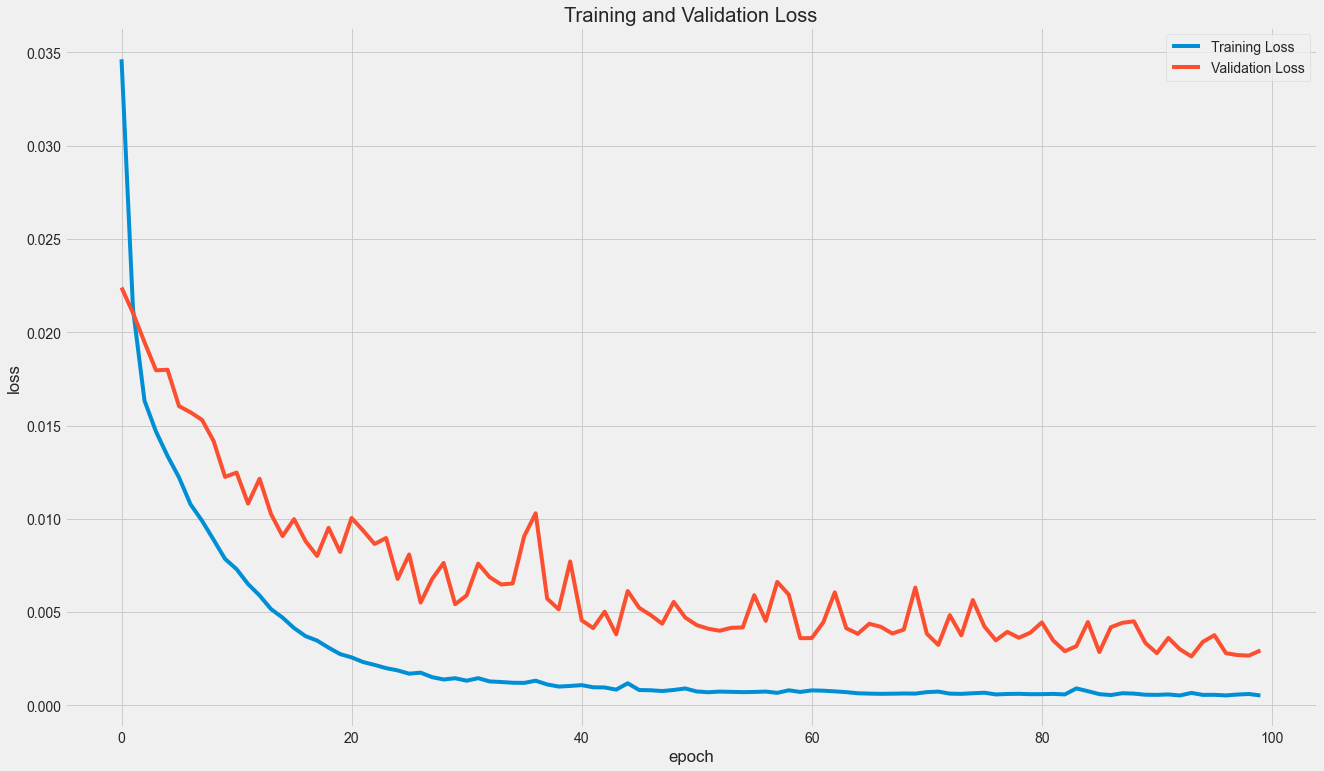

In [535]:
plt.figure(figsize=(20,12))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [536]:
predicted_stock_price = model.predict(x_test)

In [537]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [538]:
predicted_stock_price.shape

(290, 1)

In [539]:
real_stock_price = np.array(data[-290:])

In [540]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.index = data[-290:].index

In [541]:
real_stock_price = pd.DataFrame(real_stock_price)
real_stock_price.index = data[-290:].index

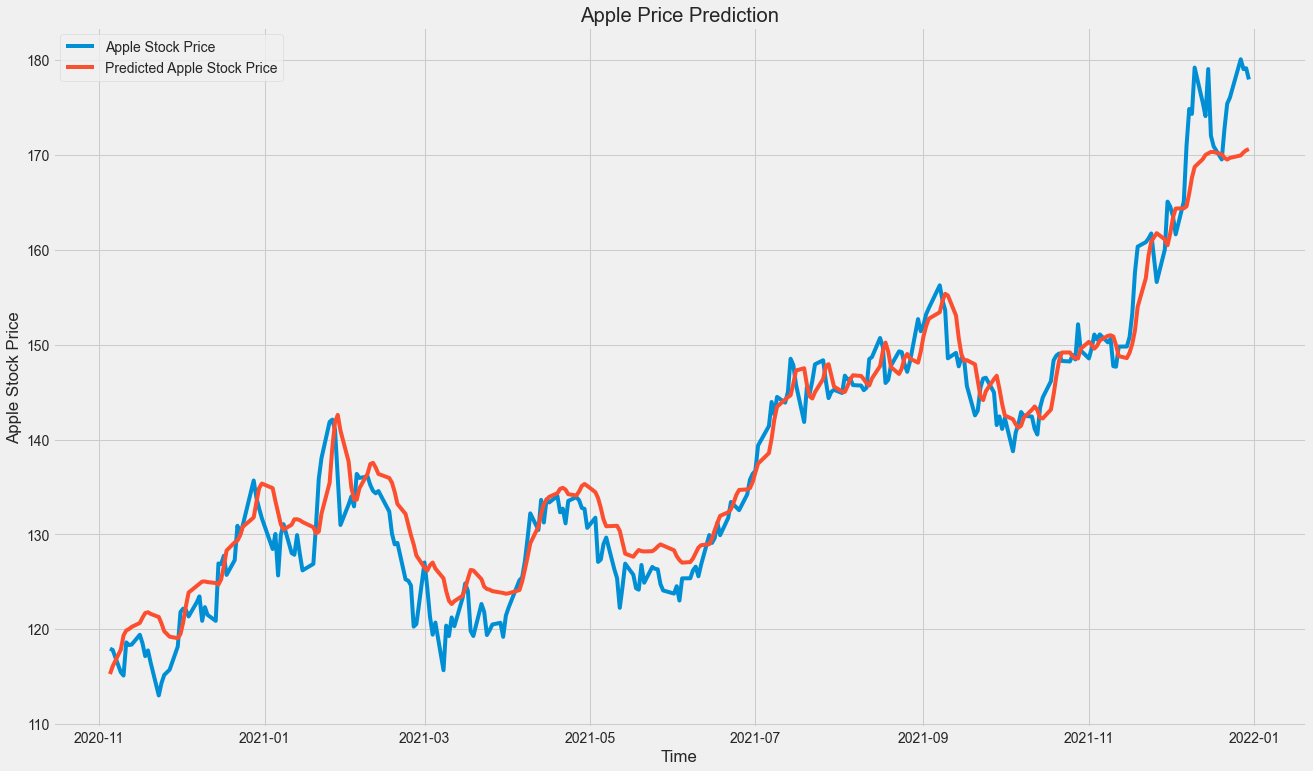

In [542]:
plt.figure(figsize=(20,12))
plt.plot(real_stock_price, label='Apple Stock Price')
plt.plot(predicted_stock_price, label='Predicted Apple Stock Price')
plt.title('Apple Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [543]:
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_price, real_stock_price)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)


均方误差: 12.482573
均方根误差: 3.533069
平均绝对误差: 2.738322


In [544]:
predicted_stock_price

In [546]:
predicted_stock_price.to_csv("prrdict_GRU.csv")